# COVID 19 Analysis (Quantitative Modelling)

# Description

### Quantitative Modelling
Quantitative models are compact representations where a single differential or difference equation may describe the performance of the system for a large set of input functions and initial states
There are three types of Quantitative modelling:
<ul>
    <li> Linear Modelling</li>
    <li> Probabilistic Modelling</li>
    <li> Regression Models</li>
</ul>

### Linear Models
Linear models can either be absolute/additive or proportionate like in the case of Simple Interest vs Compound Interest. In SI, our principal is constant and the interest is calculated on the initial principal whereas in CI, the interest for eventual time periods depends on the principal + the interest just before. In both cases we focus on growth, but one is absolute and the other is proportionate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
df = pd.read_csv('/Users/kshitij/Desktop/WidhyaAnalytics/covid19.csv')
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [3]:
#df_grp=df.groupby(by='Date', axis=0, level=None, as_index=True, sort=False)
df_grp=df.groupby(['Date'],sort=False).sum().reset_index()
df_grp.drop('Sno',axis =1,inplace=True)
df_grp['Rate of Increase in Cases']= df_grp.sum(axis=1)

df_grp

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Rate of Increase in Cases
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3
5,04/02/20,3,0,0,0,3
6,05/02/20,3,0,0,0,3
7,06/02/20,3,0,0,0,3
8,07/02/20,3,0,0,0,3
9,08/02/20,3,0,0,0,3


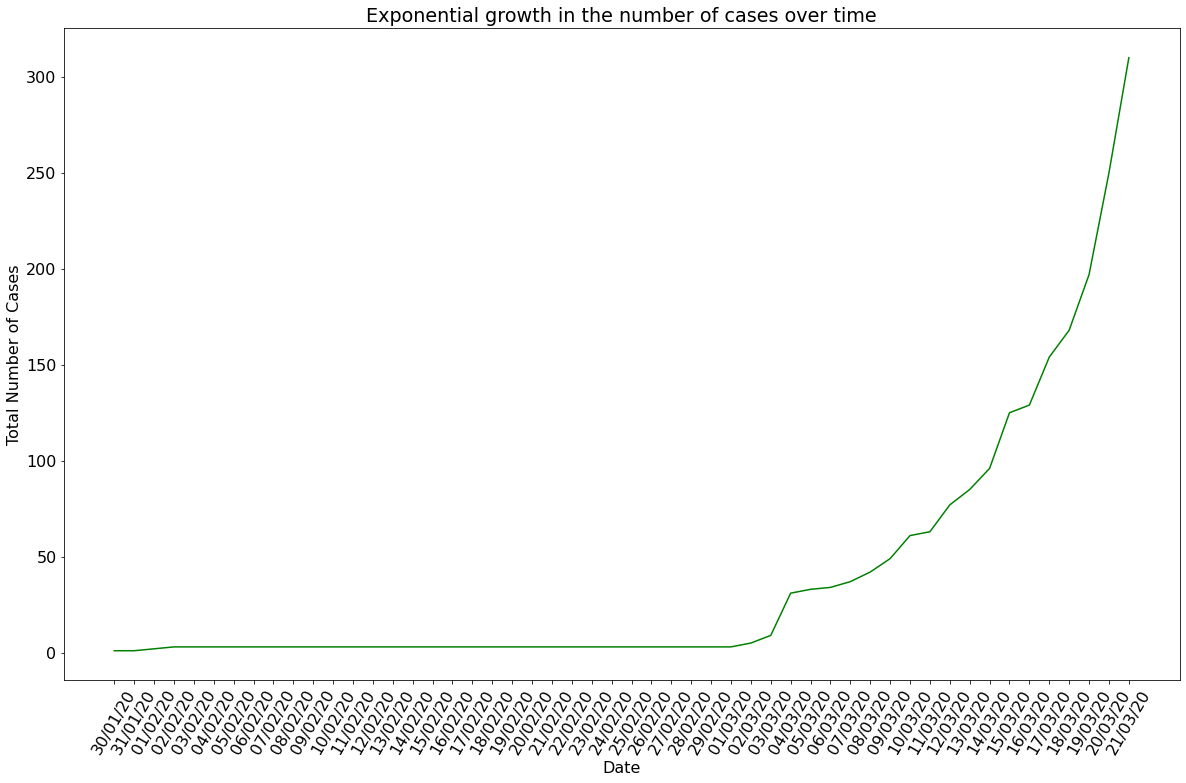

In [4]:
#Plotting the graph to see the exponential growth in the number of cases over time
plt.figure(figsize=(20, 12))
plt.rcParams['font.size'] = '16'
_=plt.plot(df_grp['Date'], df_grp['Rate of Increase in Cases'],'g')
_=plt.title('Exponential growth in the number of cases over time')
_=plt.xlabel('Date')
_=plt.ylabel('Total Number of Cases')
_=plt.xticks(rotation=60)
plt.show()

### Calculating the r( Rate of increase in the exponential growth of cases)

In [5]:
df_grp['Date']=pd.to_datetime(df_grp['Date'])

In [6]:
df_grp.info()
df_grp.sort_values(by=['Date'], axis=0, ascending=True, inplace=True)
df_grp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       52 non-null     datetime64[ns]
 1   ConfirmedIndianNational    52 non-null     int64         
 2   ConfirmedForeignNational   52 non-null     int64         
 3   Cured                      52 non-null     int64         
 4   Deaths                     52 non-null     int64         
 5   Rate of Increase in Cases  52 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.6 KB


,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Rate of Increase in Cases
2,2020-01-02,2,0,0,0,2
31,2020-01-03,3,0,0,0,3
0,2020-01-30,1,0,0,0,1
1,2020-01-31,1,0,0,0,1
3,2020-02-02,3,0,0,0,3
32,2020-02-03,5,0,0,0,5
14,2020-02-13,3,0,0,0,3
15,2020-02-14,3,0,0,0,3
16,2020-02-15,3,0,0,0,3
17,2020-02-16,3,0,0,0,3


In [7]:
start_date = '2020-03-03'
end_date = '2020-03-21'

In [8]:
mask = (df_grp['Date'] > start_date) & (df_grp['Date'] <= end_date)

In [9]:
df_grp = df_grp.loc[mask]
df_grp

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Rate of Increase in Cases
43,2020-03-13,64,17,3,1,85
44,2020-03-14,67,17,10,2,96
45,2020-03-15,93,17,13,2,125
46,2020-03-16,97,17,13,2,129
47,2020-03-17,113,24,14,3,154
48,2020-03-18,126,25,14,3,168
49,2020-03-19,148,25,20,4,197
50,2020-03-20,191,32,23,4,250
51,2020-03-21,244,39,23,4,310


In [10]:
r=(df_grp['Rate of Increase in Cases']-df_grp['Rate of Increase in Cases'].shift(1))/df_grp['Rate of Increase in Cases']
r=r.mean()
r

0.14700232373331237

In [11]:
from math import e

P_o=31
t=26
P_t=P_o*(e**(r*t))
P_t

1416.6463352388582